**Exercise 3** - 
Normally distributed random numbers

a) Implement a way to generate normally distributed one-dimensional random numbers with mean
0 and standard deviation of 1.0.

In [1]:
class UniformRandomNumbersGenerator:
  def __init__(self, seed, n):
    self.a = 1103515245 #Multiplier
    self.b = 12345 #Increment
    self.m = 2**31 #Modulus
    self.z = seed #Start value
    self.n = n #Size of sample set
    self.arr =[]

  def next(self):
    for i in range(self.n):
      self.z = (self.a * self.z + self.b) % self.m  #Linear Congruential Generator
      self.arr.append(self.z / self.m)
    return self.arr

In [2]:
import numpy as np
def normal_distributed_random_numbers(size):

  #Generate independent, uniformly distributed n random numbers
  c1 = UniformRandomNumbersGenerator(seed = 347, n = size)
  u1 = c1.next()
  c2 = UniformRandomNumbersGenerator(seed = 489, n = size)
  u2 = c2.next()

  #Box-Muller method: calculate independent, standard-normal distributed n random numbers
  u1 = np.array(u1)
  u2 = np.array(u2)
  z1 = np.sqrt(-2 * np.log(u2)) * np.cos(2 * np.pi * u1)
  z2 = np.sqrt(-2 * np.log(u2)) * np.sin(2 * np.pi * u1)
  return z1

b) Use the random number generator from 3 a) to create a sample set of random numbers. Estimate
the parameters of the underlying normal distribution from this sample set. What do you observe?
How accurate is your parameter estimate? What happens if the size of the sample set changes?

In [3]:
# Generate a sample set of n normally distributed random numbers
n = 1000
sample_set = normal_distributed_random_numbers(n)

# Estimate the mean and standard deviation of the underlying normal distribution from the sample
mu = sum(sample_set) / n
s = 0
for j in sample_set:
  s = s + (j - mu) **2
sigma = np.sqrt(s / n)

print("Estimated mean:", mu)
print("Estimated standard deviation:", sigma)

Estimated mean: -0.011908012133278998
Estimated standard deviation: 0.9923140366496289


c) How can you check if your random numbers really follow the distribution from 3 a)?

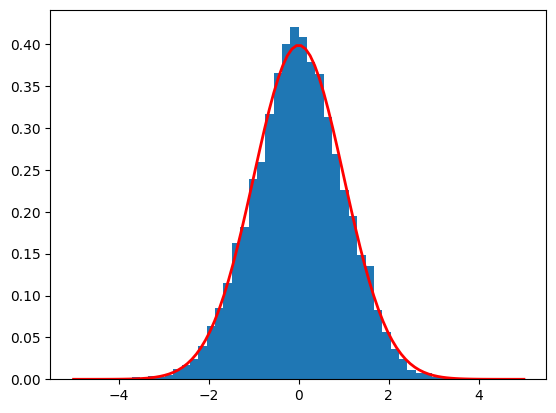

In [4]:
import matplotlib.pyplot as plt
plt.hist(sample_set, bins = 50, density = True)
x = np.linspace(-5, 5, 100)
pdf = 1 / np.sqrt(2 * np.pi) * np.exp(-x **2 / 2) #Probablity Density Function of Normal Distribution
plt.plot(x, pdf, 'r-', linewidth=2)
plt.show()